## Task:

 You have been invited to participate in one of the UNICEF projects, an international UN entity whose mission is to increase the well-being of children around the world.
The essence of the project is to track the impact of living conditions of students aged 15 to 22 on their academic performance in mathematics, in order to identify students at risk at an early stage.
To do this, you need to build a model that would predict the results of the state exam in mathematics for each student in the school

## Attributes for  dataset:


- school - student's school ('GP' or 'MS')
- sex - student's sex ('F' - female or 'M' - male)
- age - student's age (from 15 to 22)
- address - student's home address type ('U' - urban or 'R' - rural)
- famsize - family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status ('T' - living together or 'A' - apart)
- Medu - mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary   education or 4 – higher education)
- Fedu - father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian ('mother', 'father' or 'other')
- traveltime - home to school travel time (1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 - >60 min.)
- studytime - weekly study time (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours)
- failures - number of past class failures (n if 1<=n<3, else 0)
- schoolsup - extra educational support (yes or no)
- famsup - family educational support (yes or no)
- paid - extra paid classes (yes or no)
- activities - extra-curricular activities (yes or no)
- nursery - attended nursery school (yes or no)
- higher - wants to take higher education (yes or no)
- internet - Internet access at home (yes or no)
- romantic - with a romantic relationship (yes or no)
- famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
- freetime - free time after school (from 1 - very low to 5 - very high)
- goout - going out with friends (from 1 - very low to 5 - very high)
- health - current health status (from 1 - very bad to 5 - very good)
- absences - number of school absences 
- score - gained score for the state exam

## Initial data review

As the first step, we have to import some libraries and set the option to display more colums and rows then by default:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

#### Let's open the dataset and look into it:

In [2]:
data_math = pd.read_csv('stud_math.csv')
data_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
data_math.info()
data_math.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000



- **Numeric**: age, absences, score
- **Nominal binary**: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school
- **Nominal**: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health 

**Total columns** : 30 

Column 'studytime, granular' - not described

#### I'm going to create some functions to make things more efficient:

- to build plots 
- to calculate some essential stat indexes
- to count missed values

In [4]:
def plot_func(feature):

    if data_math[feature].dtype == 'O':
        sns.countplot(x=feature, data=data_math, label=feature)
    else:
        sns.distplot(a=data_math[feature], label=feature,
                     kde=False, bins=data_math[feature].nunique())

In [5]:
def stat_func(x):
    Q1 = data_math[x].quantile(0.25)
    Q2 = data_math[x].quantile(0.75)
    IQR = Q2 - Q1
    Missed_v = data_math[x].isnull().sum()
    Unique_v = data_math[x].nunique()
    disp = 'IQR: {} '.format(IQR), 'Outliers limit: [{f}, {l}] '.format(
        f=Q1 - 1.5*IQR, l=Q2 + 1.5*IQR), 'Missed values: {} '.format(Missed_v), 'Unique values: {} '.format(Unique_v)

    return disp

In [6]:
def missed_v(y):
    missed = data_math[y].isnull().sum()

    return ('Missed values: {} '.format(missed))

#### Now we can look into each column, let's start with age:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

('IQR: 2.0 ',
 'Outliers limit: [13.0, 21.0] ',
 'Missed values: 0 ',
 'Unique values: 8 ')

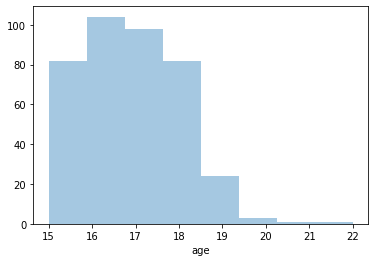

In [7]:
display(data_math.age.describe())
display(stat_func('age'))
plot_func('age')

It looks like a normal deviation and there are no missing values. 
Value "22" was considered as an outlier, but it's essential attribute so let's leave it

#### mother's education

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

('IQR: 2.0 ',
 'Outliers limit: [-1.0, 7.0] ',
 'Missed values: 3 ',
 'Unique values: 5 ')

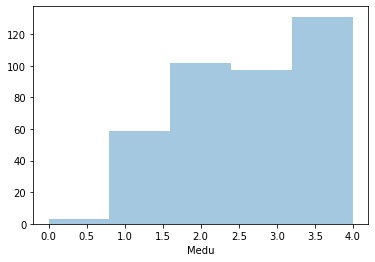

In [8]:
display(data_math.Medu.describe())
display(stat_func('Medu'))
plot_func('Medu')

Majority of mothers do not have higher education, 
 but still almost all of them have attended school

#### father's education

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [0.5, 4.5] ',
 'Missed values: 24 ',
 'Unique values: 6 ')

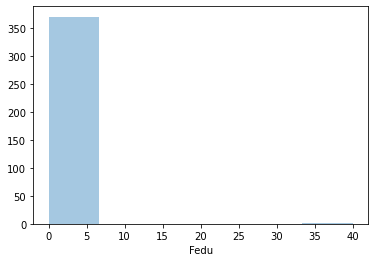

In [9]:
display(data_math.Fedu.describe())
display(stat_func('Fedu'))
plot_func('Fedu')

It seems that there is some error into the data

In [10]:
data_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Yes, there is just one wrong value as 40, looks like a typing mistake, let's replace it with 4:

In [11]:
data_math.Fedu = data_math.Fedu.apply(lambda x: 4 if x == 40 else x)

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [0.5, 4.5] ',
 'Missed values: 24 ',
 'Unique values: 5 ')

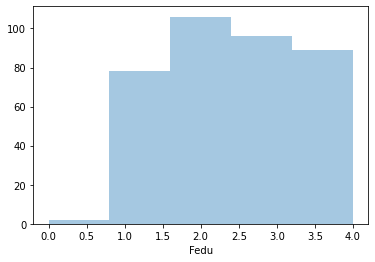

In [12]:
display(data_math.Fedu.describe())
display(stat_func('Fedu'))
plot_func('Fedu')

Almost all of the fathers have attended school, but majority doesn't have higher education

#### traveltime

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [-0.5, 3.5] ',
 'Missed values: 28 ',
 'Unique values: 4 ')

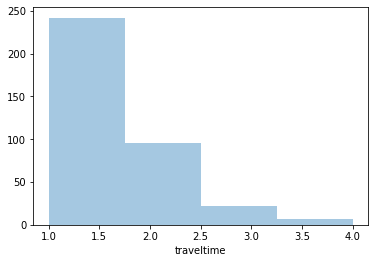

In [13]:
display(data_math.traveltime.describe())
display(stat_func('traveltime'))
plot_func('traveltime')

Majority of the students spend less then 30 min to reach school

#### studytime 

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [-0.5, 3.5] ',
 'Missed values: 7 ',
 'Unique values: 4 ')

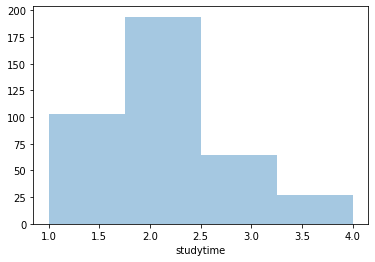

In [14]:
display(data_math.studytime.describe())
display(stat_func('studytime'))
plot_func('studytime')

Majority of the students spend less then 5 hours per week for extracurricular activities, which is not much

#### studytime, granular

I"m going to rename this column to studytime_gr as original title is not really suitable

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gr, dtype: float64

('IQR: 3.0 ',
 'Outliers limit: [-10.5, 1.5] ',
 'Missed values: 7 ',
 'Unique values: 4 ')

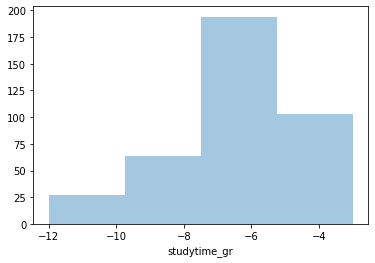

In [15]:
data_math.rename(columns={'studytime, granular': 'studytime_gr'}, inplace=True)
display(data_math.studytime_gr.describe())
display(stat_func('studytime_gr'))
plot_func('studytime_gr')

Looks like reversed distribution of studytime.
Let's check what kind of correlation is between studytime and studytime_gr:


In [16]:
data_math['studytime'].corr(data_math['studytime_gr'])

-0.9999999999999991

It's way too correlated, we don't need studytime_gr to be in our dataset, so i'm going to drop it


In [17]:
data_math.drop(['studytime_gr'], inplace=True, axis=1)

#### failures 

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

('IQR: 0.0 ',
 'Outliers limit: [0.0, 0.0] ',
 'Missed values: 22 ',
 'Unique values: 4 ')

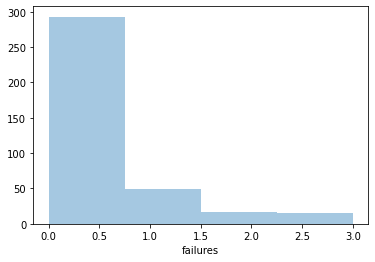

In [18]:
display(data_math.failures.describe())
display(stat_func('failures'))
plot_func('failures')

It's good to know that most of the students didn't experience failures in personal matters

#### famrel

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [2.5, 6.5] ',
 'Missed values: 27 ',
 'Unique values: 6 ')

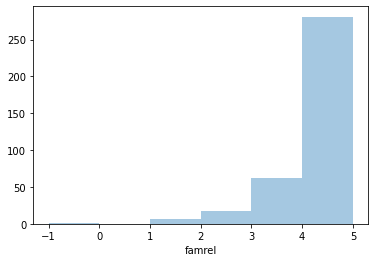

In [19]:
display(data_math.famrel.describe())
display(stat_func('famrel'))
plot_func('famrel')

I think there is a typing mistake, so i'm going to substitute this single negative value with the same but positive one:

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [2.5, 6.5] ',
 'Missed values: 27 ',
 'Unique values: 5 ')

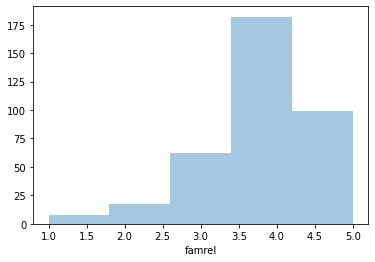

In [20]:
data_math.famrel = data_math.famrel.apply(lambda x: 1 if x == -1 else x)
display(data_math.famrel.describe())
display(stat_func('famrel'))
plot_func('famrel')

It's nice that most of the students have good interpersonal relationships within the family

#### freetime

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

('IQR: 1.0 ',
 'Outliers limit: [1.5, 5.5] ',
 'Missed values: 11 ',
 'Unique values: 5 ')

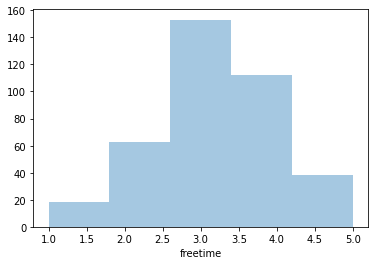

In [21]:
display(data_math.freetime.describe())
display(stat_func('freetime'))
plot_func('freetime')

Majority of the students have quite a lot of free time

#### goout

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

('IQR: 2.0 ',
 'Outliers limit: [-1.0, 7.0] ',
 'Missed values: 8 ',
 'Unique values: 5 ')

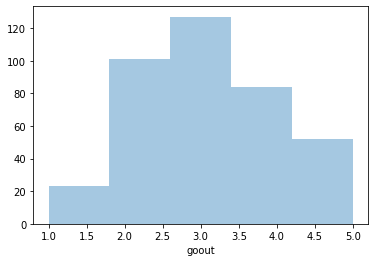

In [22]:
display(data_math.freetime.describe())
display(stat_func('goout'))
plot_func('goout')

Looks like approx half of the students spend not much time going out, and another half vice versa

#### health

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

('IQR: 2.0 ',
 'Outliers limit: [0.0, 8.0] ',
 'Missed values: 15 ',
 'Unique values: 5 ')

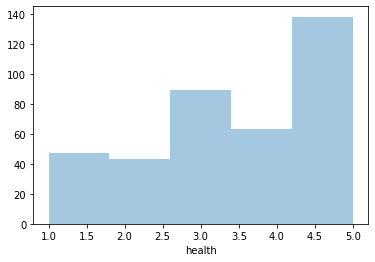

In [23]:
display(data_math.health.describe())
display(stat_func('health'))
plot_func('health')

Around 25% of students have health issues, that's quite a lot

#### absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

('IQR: 8.0 ',
 'Outliers limit: [-12.0, 20.0] ',
 'Missed values: 12 ',
 'Unique values: 36 ')

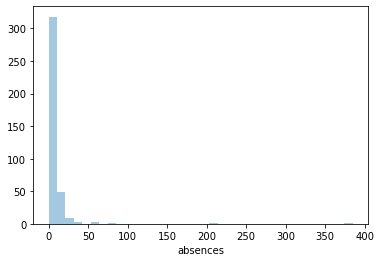

In [24]:
display(data_math.absences.describe())
display(stat_func('absences'))
plot_func('absences')

We see some values which are much greater then the rest, these are certanly the outliers, let's remove it:

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

('IQR: 7.0 ',
 'Outliers limit: [-10.5, 17.5] ',
 'Missed values: 0 ',
 'Unique values: 21 ')

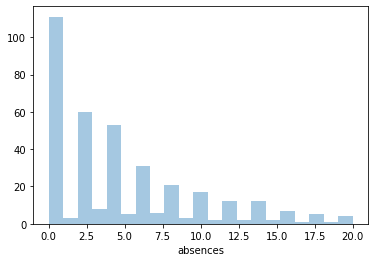

In [25]:
data_math = data_math.loc[data_math.absences <= 20]

display(data_math.absences.describe())
plot_func('absences')
display(stat_func('absences'))

Now looks better, it's clearly seen that it's not popular to be abscent

#### score

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

('IQR: 30.0 ',
 'Outliers limit: [-5.0, 115.0] ',
 'Missed values: 5 ',
 'Unique values: 17 ')

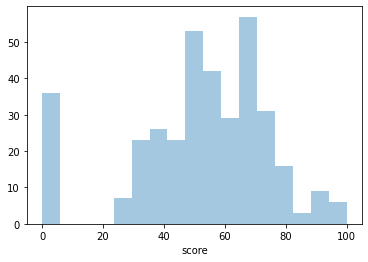

In [26]:
display(data_math.absences.describe())
display(stat_func('score'))
plot_func('score')

Seems that many people got 0 as score by unknown reasons, and the column with zeros stops the deviation from being normal, but i think we should leave zeros as it may be a real score for the exam.

#### Mjob

count       350
unique        5
top       other
freq        123
Name: Mjob, dtype: object

'Missed values: 16 '

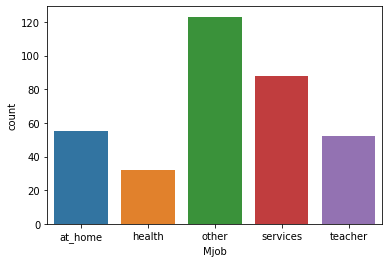

In [27]:
display(data_math.Mjob.describe())
display(missed_v('Mjob'))
plot_func('Mjob')

Most women are working, which means they have some education for that

#### Fjob

count       332
unique        5
top       other
freq        185
Name: Fjob, dtype: object

'Missed values: 34 '

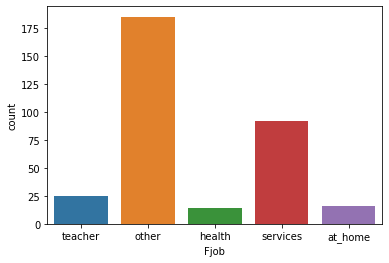

In [28]:
display(data_math.Fjob.describe())
display(missed_v('Fjob'))
plot_func('Fjob')

It seems that fathers prefer other types of job then healthcare and teaching, but they stay at home less then women

#### sex

count     366
unique      2
top         F
freq      191
Name: sex, dtype: object

'Missed values: 0 '

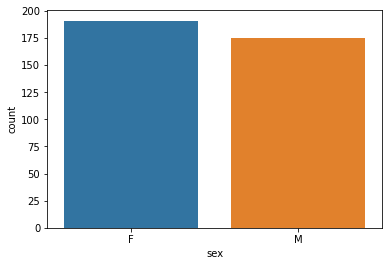

In [29]:
display(data_math.sex.describe())
display(missed_v('sex'))
plot_func('sex')

Almost equal qty of boys and girls, but still there are a bit more girls


#### address

count     351
unique      2
top         U
freq      273
Name: address, dtype: object

'Missed values: 15 '

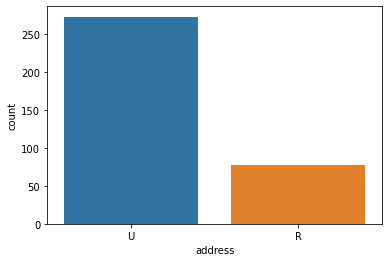

In [30]:
display(data_math.address.describe())
display(missed_v('address'))
plot_func('address')

Most of the students live in the city, which most probably means they spend less time to reach the school


#### famsize

count     344
unique      2
top       GT3
freq      245
Name: famsize, dtype: object

'Missed values: 22 '

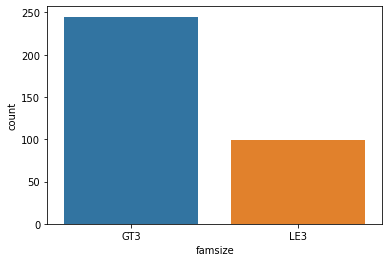

In [31]:
display(data_math.famsize.describe())
display(missed_v('famsize'))
plot_func('famsize')

Most of the students have more then 3 members in the family

#### Pstatus

count     328
unique      2
top         T
freq      296
Name: Pstatus, dtype: object

'Missed values: 38 '

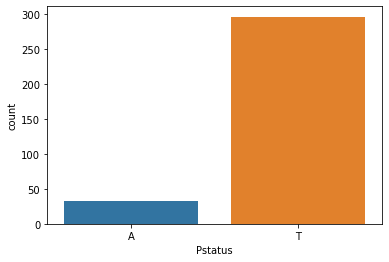

In [32]:
display(data_math.Pstatus.describe())
display(missed_v('Pstatus'))
plot_func('Pstatus')

Most of the parents stay together, which is good for kids

#### reason

count        349
unique         4
top       course
freq         129
Name: reason, dtype: object

'Missed values: 17 '

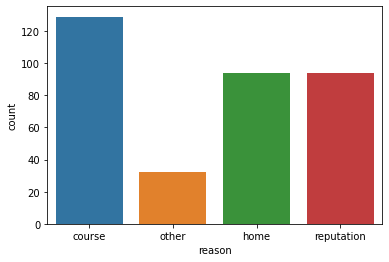

In [33]:
display(data_math.reason.describe())
display(missed_v('reason'))
plot_func('reason')

Leading reason is course, so some parents seem to want their kids to study

#### school

count     366
unique      2
top        GP
freq      322
Name: school, dtype: object

'Missed values: 0 '

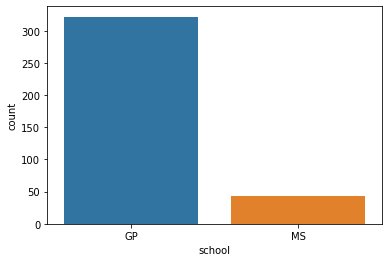

In [34]:
display(data_math.school.describe())
display(missed_v('school'))
plot_func('school')

School GP is the most common into this dataset

#### guardian

count        336
unique         3
top       mother
freq         229
Name: guardian, dtype: object

'Missed values: 30 '

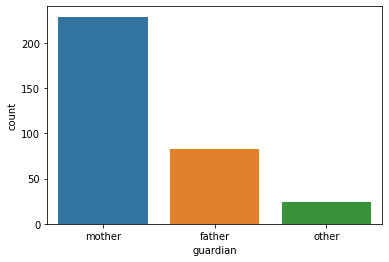

In [35]:
display(data_math.guardian.describe())
display(missed_v('guardian'))
plot_func('guardian')

Most of the students are guarded by mothers

#### schoolsup

count     357
unique      2
top        no
freq      310
Name: schoolsup, dtype: object

'Missed values: 9 '

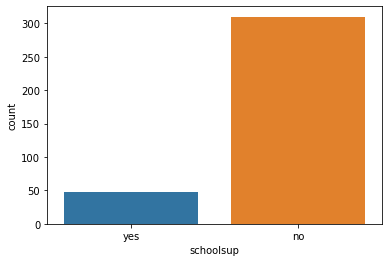

In [36]:
display(data_math.schoolsup.describe())
display(missed_v('schoolsup'))
plot_func('schoolsup')

Seems the school do not really support majority of the students

#### famsup

count     331
unique      2
top       yes
freq      204
Name: famsup, dtype: object

'Missed values: 35 '

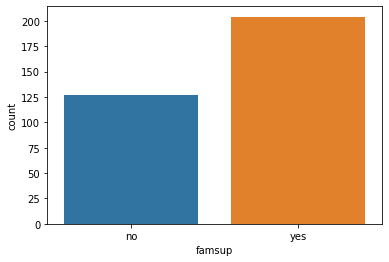

In [37]:
display(data_math.famsup.describe())
display(missed_v('famsup'))
plot_func('famsup')

Good that most of the families support their kids

#### paid

count     328
unique      2
top        no
freq      189
Name: paid, dtype: object

'Missed values: 38 '

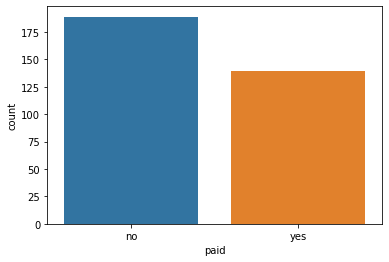

In [38]:
display(data_math.paid.describe())
display(missed_v('paid'))
plot_func('paid')

But still support doesn't mean to pay for extra math classes

#### activities

count     352
unique      2
top       yes
freq      184
Name: activities, dtype: object

'Missed values: 14 '

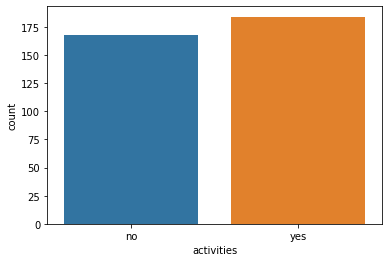

In [39]:
display(data_math.activities.describe())
display(missed_v('activities'))
plot_func('activities')

More then a half of the students seem to be active with additional classes


#### nursery

count     350
unique      2
top       yes
freq      277
Name: nursery, dtype: object

'Missed values: 16 '

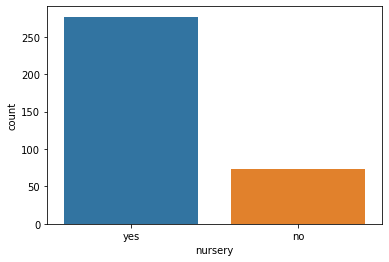

In [40]:
display(data_math.nursery.describe())
display(missed_v('nursery'))
plot_func('nursery')

Majority of the students have attended nursery

#### higher

count     348
unique      2
top       yes
freq      332
Name: higher, dtype: object

'Missed values: 18 '

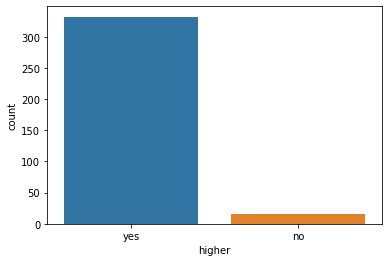

In [41]:
display(data_math.higher.describe())
display(missed_v('higher'))
plot_func('higher')

Most of the students want to get higher education

#### internet

count     334
unique      2
top       yes
freq      279
Name: internet, dtype: object

'Missed values: 32 '

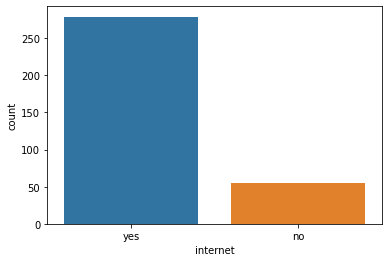

In [42]:
display(data_math.internet.describe())
display(missed_v('internet'))
plot_func('internet')

Most of the students have access to internet

#### romantic

count     336
unique      2
top        no
freq      225
Name: romantic, dtype: object

'Missed values: 30 '

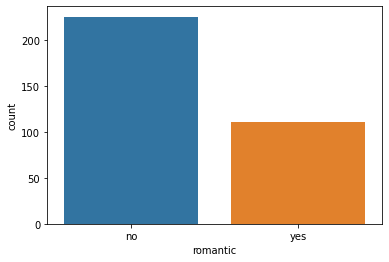

In [43]:
display(data_math.romantic.describe())
display(missed_v('romantic'))
plot_func('romantic')

Majority of the students don't have romantic relationships

## Correlation of the numeric attributes

Just 3 columns are truly numeric, so let's look into the correlation between them

In [44]:
data_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.151493,-0.159306
absences,0.151493,1.000000,0.081274
score,-0.159306,0.081274,1.000000


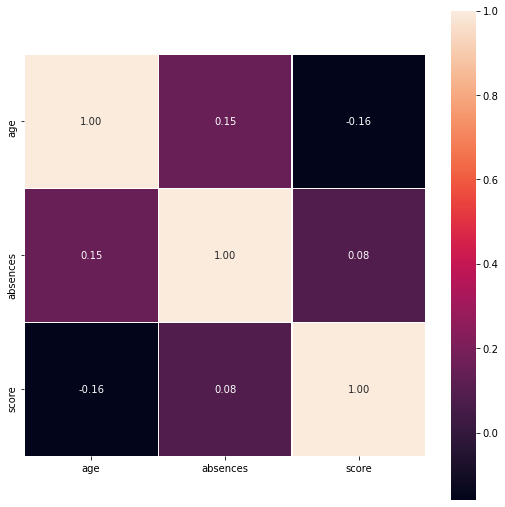

In [45]:
nums = ['age', 'absences', 'score']
plt.figure(figsize=(9, 9))
sns.heatmap(data_math[nums].corr(), square=True,
            fmt='.2f', linewidths=0.1, annot=True)

- Negative correlation between age and score shows that elder students have lower score
- Positive correlation between age and absences shows that younger students tend to skip classes more often
- None of them are strongly correlated, so we should leave it as it is

## Boxplots for nominal attributes

In [46]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(9, 3))
    sns.boxplot(x=column, y='score',
                data=data_math,
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

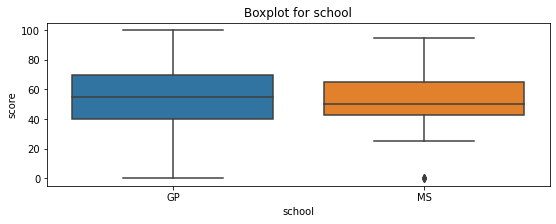

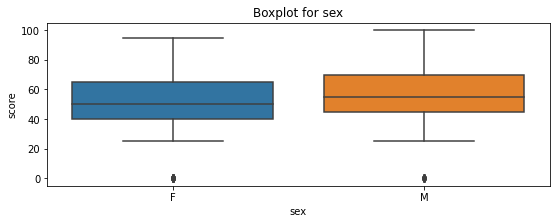

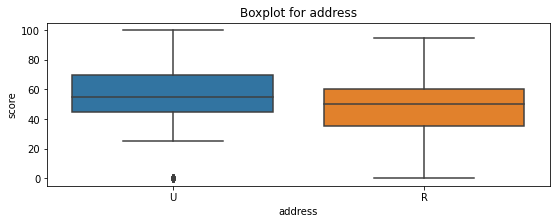

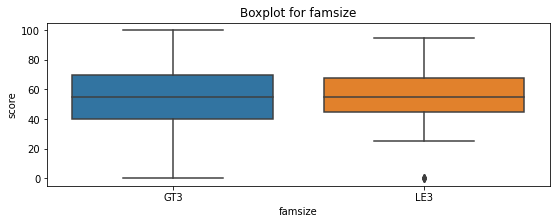

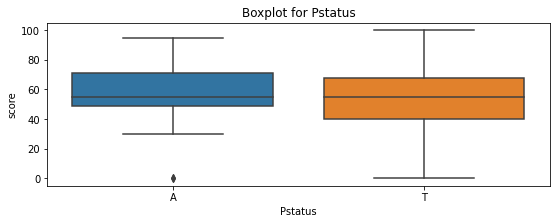

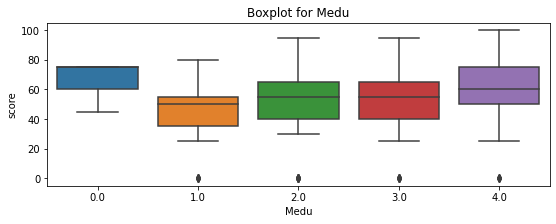

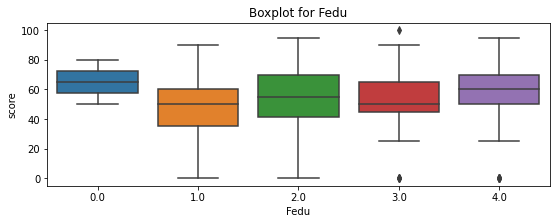

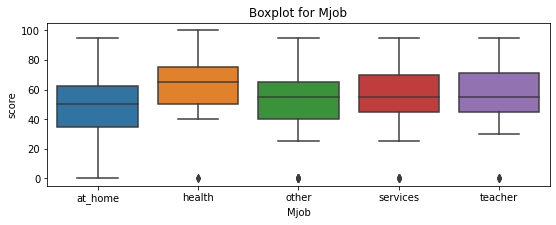

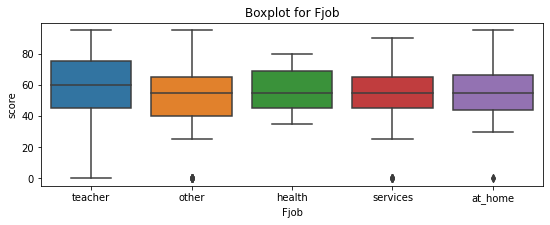

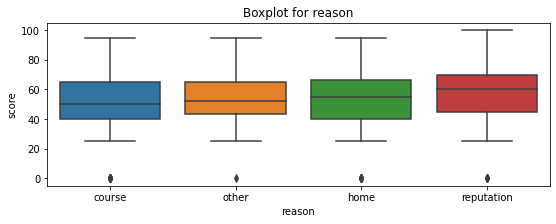

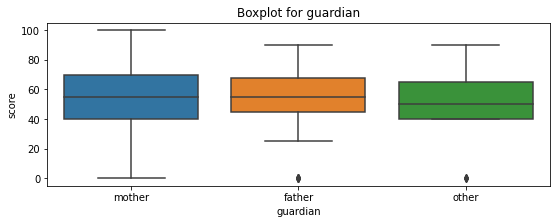

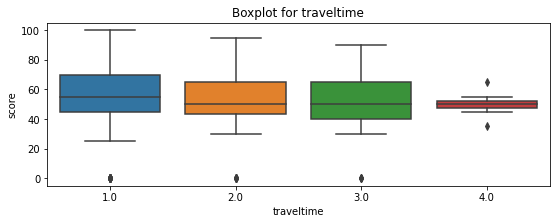

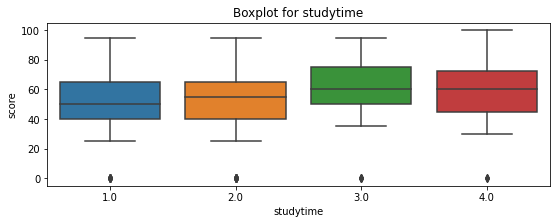

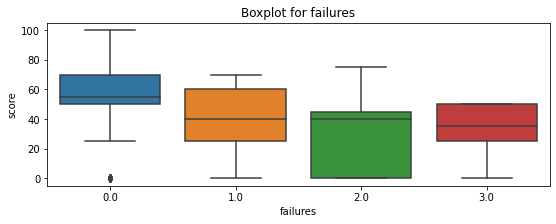

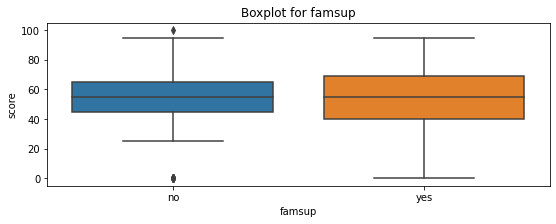

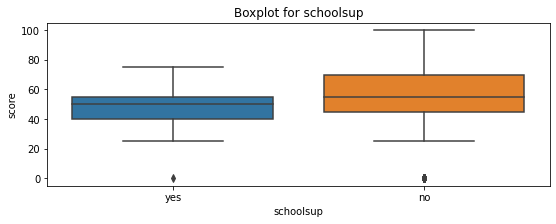

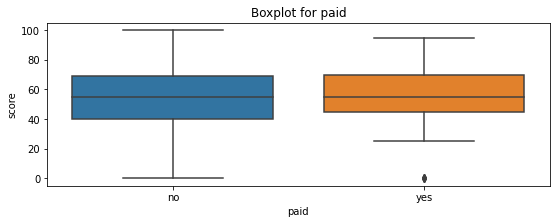

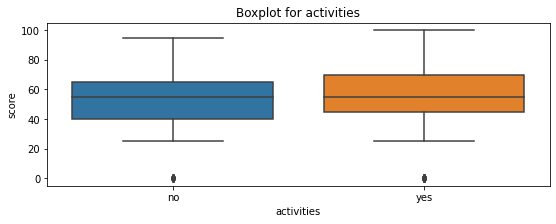

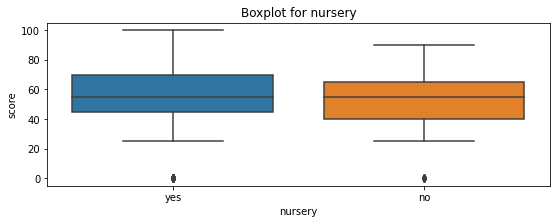

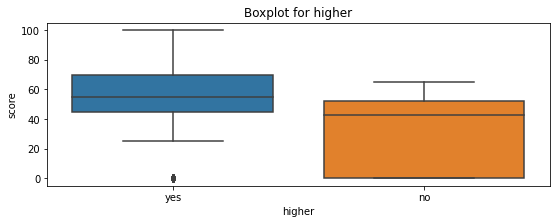

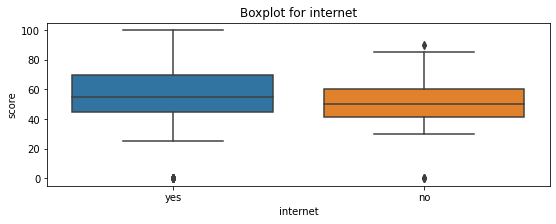

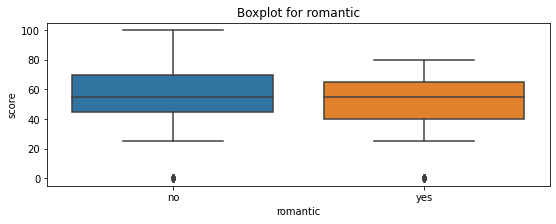

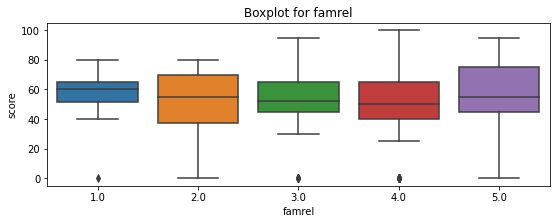

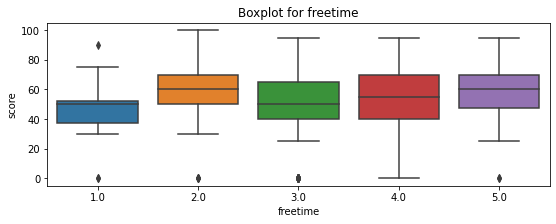

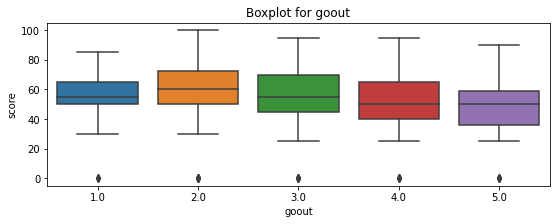

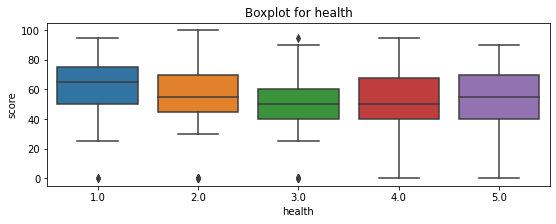

In [47]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'famsup', 'schoolsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

It seems that many attributes can have an influence on the score, so we can select just significant ones with Student's t-test

## Student's t-test for nominal attributes

In [48]:
def get_stat_dif(column):
    cols = data_math[column].dropna().unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data_math.loc[data_math.loc[:, column] == comb[0], 'score'].dropna(),
                     data_math.loc[data_math.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):
            print('Statistically significant differences found for column', column)
            break

In [49]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'famsup', 'schoolsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Statistically significant differences found for column sex
Statistically significant differences found for column address
Statistically significant differences found for column Medu
Statistically significant differences found for column Mjob
Statistically significant differences found for column failures
Statistically significant differences found for column paid
Statistically significant differences found for column higher
Statistically significant differences found for column romantic


#### According to correlation analysis and Student's t-test, we should leave just the following columns as it's considered significant:

- sex
- address
- Medu
- Mjob
- failures
- paid
- higher
- romantic
- age
- absences

And now i'm going to drop the rest:

In [50]:
data_math.drop(columns=['school', 'famsize', 'Pstatus', 'Fedu',
                        'Fjob', 'reason', 'traveltime', 'studytime', 'guardian',
                        'famsup', 'schoolsup', 'activities', 'nursery',
                        'internet', 'famrel', 'freetime', 'goout', 'health'], axis=1, inplace=True)

In [51]:
data_math.head(5)

,sex,age,address,Medu,Mjob,failures,paid,higher,romantic,absences,score
0,F,18,U,4.0,at_home,0.0,no,yes,no,6.0,30.0
1,F,17,U,1.0,at_home,0.0,no,yes,no,4.0,30.0
2,F,15,U,1.0,at_home,3.0,NaN,yes,NaN,10.0,50.0
3,F,15,U,4.0,health,0.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,other,0.0,yes,yes,no,4.0,50.0


## Preparation for modelling


As we see, some columns contain non-numeric values, so we need to convert it to numeric ones

In [52]:
data_math['sex'] = data_math['sex'].map({'F': 1, 'M': 0})
data_math['address'] = data_math['address'].map({'U': 1, 'R': 0})
data_math['paid'] = data_math['paid'].map({'yes': 1, 'no': 0})
data_math['higher'] = data_math['higher'].map({'yes': 1, 'no': 0})
data_math['romantic'] = data_math['romantic'].map({'yes': 1, 'no': 0})
data_math['Mjob'] = data_math['Mjob'].map(
    {'at_home': 0, 'health': 1, 'teacher': 2, 'services': 3, 'other': 4})

In [53]:
data_math.head(5)

,sex,age,address,Medu,Mjob,failures,paid,higher,romantic,absences,score
0,1,18,1.0,4.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0
1,1,17,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,30.0
2,1,15,1.0,1.0,0.0,3.0,NaN,1.0,NaN,10.0,50.0
3,1,15,1.0,4.0,1.0,0.0,1.0,1.0,1.0,2.0,75.0
4,1,16,1.0,3.0,4.0,0.0,1.0,1.0,0.0,4.0,50.0


## Conclusions

- There is not much missed values, data is pretty clean and do not require much processing, as outliers were found just in 2 columns
- Negative correlation between age and score shows that elder students have lower score
- Positive correlation between age and absences shows that younger students tend to skip classes more often
- Mother's education and job has an impact on the score, which is reasonable, considering the fact that the most of the guardians are mothers
- Students who wants to get higher education show better results at the exam
- Boys get better score for math, and romantic realtionships have some impact on the score
- Kids living out of the city seem to be more distracted from the study. May be because of long way to school or due to extra daily responsibilities related to rural life
- Kids whose parents pay for extra education use to have better scores
- And of course some failures can disappoint and it's harder to move on, so its reflected on the score as well  